<h1 align="center"> Automotive Electronics Assignment </h1>

<h2 align="center"> Project Lane Detection </h2>


<h3 align="right"> Nirmal Kumar D R <br>17BEC134</h3>

### Project Description:
   This Project is based on the Opencv python module.Identifying the lanes in the roads is common task.This is critical task for automonous vehicle to perform.Here This project based on the simple Lane detection pipeline with computer vision technique.For more info check  [GitHub Link](https://github.com/NirmalRG/lanedetector.git)

## Lane Detection Pipeline:

1. Convert original image to Grayscale.
2. Darkened the gray scale image.
3. Convert original image to HLS colour space.
4. Isolate yellow from HLS to get yellow mask (for yellow lane marking).
5. Isolate yellow from HLS to get white mask (for white lane marking).
6. Bit-wise OR yellow and white masks to get common mask.
7. Bit-wise AND mask with Darkened image.
8. Apply slight Gaussian Blur.
9. Apply canny Edge Detector 
10. Define Region of Interest. This helps in weeding out unwanted edges detected by canny edge detector.
11. Retrieve Hough lines.
12. Consolidate and extrapolate the Hough Lines and Draw them on original image

## Import Packages

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
import cv2
from module import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [5]:
PATH = "images"
test_imgs = os.listdir(PATH)
test_imgs

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

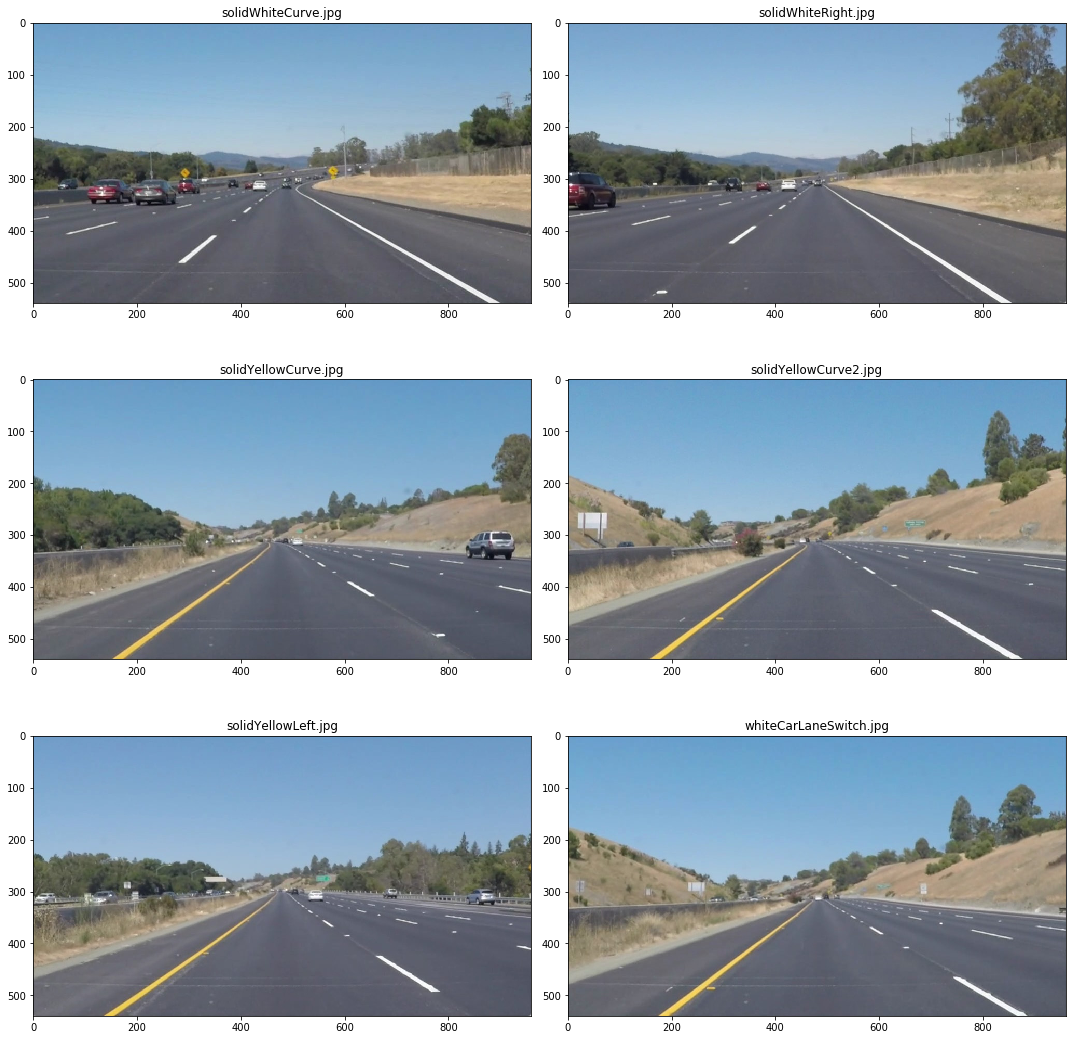

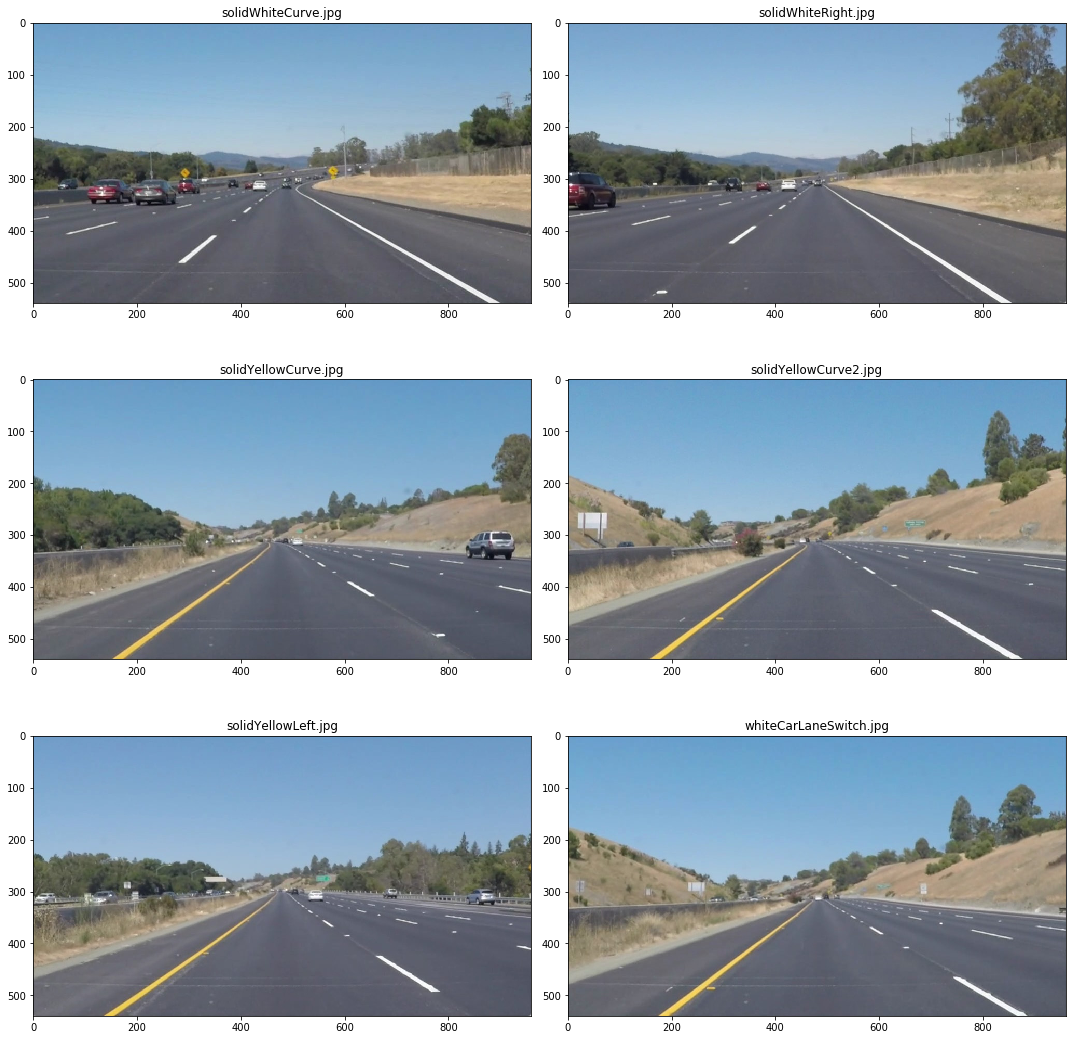

In [6]:
img_list = [read_img(PATH +"/" + name) for name in test_imgs]
display_imgs(img_list, test_imgs)
display_imgs(img_list, test_imgs)
save_imgs(img_list, test_imgs, prefix= "Original")

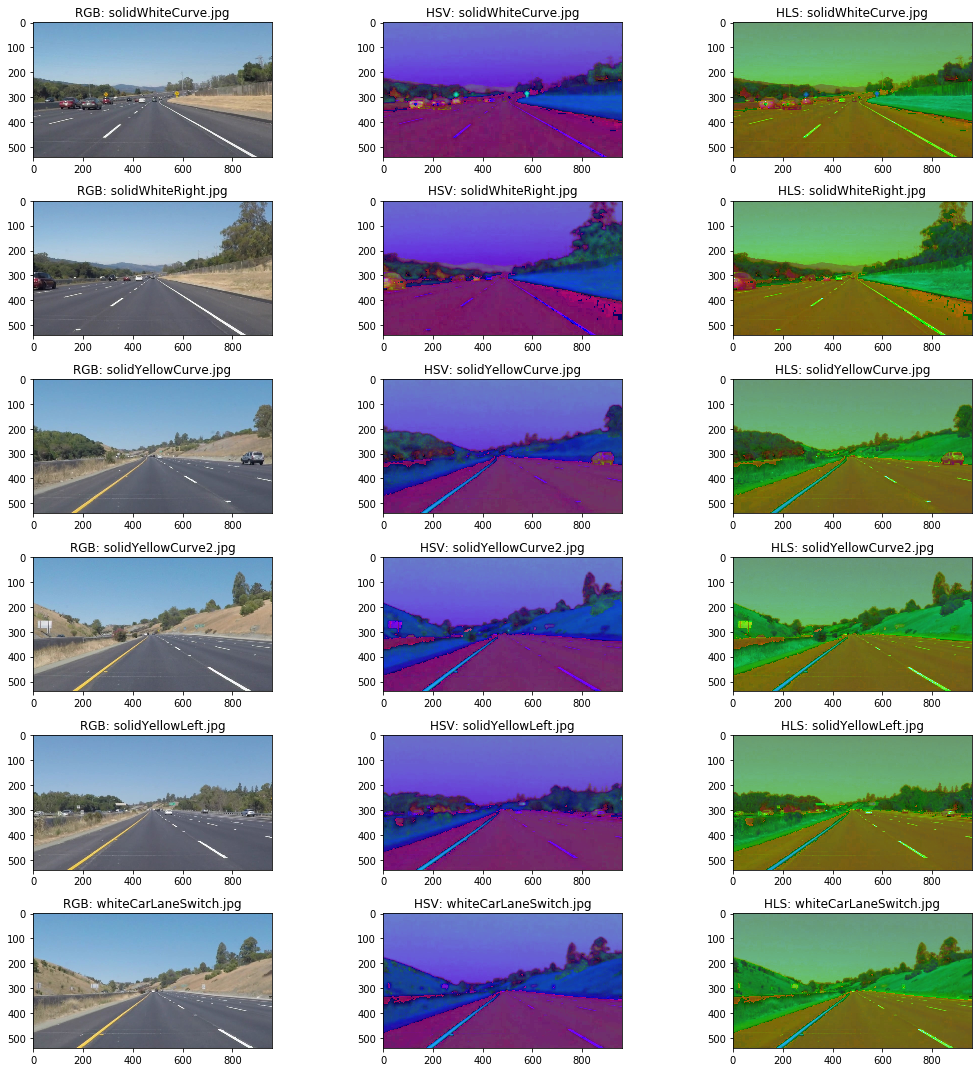

In [8]:
diff_color_spaces_imgs = []
diff_color_spaces_labels = []
for i in range(len(img_list)):
    diff_color_spaces_imgs.append(img_list[i])
    diff_color_spaces_labels.append("RGB: " +test_imgs[i])
    diff_color_spaces_imgs.append(to_hsv(img_list[i]))
    diff_color_spaces_labels.append("HSV: " +test_imgs[i])
    diff_color_spaces_imgs.append(to_hls(img_list[i]))
    diff_color_spaces_labels.append("HLS: " +test_imgs[i])
display_imgs(diff_color_spaces_imgs, diff_color_spaces_labels, cols=3)

In [9]:
original_imgs = np.copy(img_list)

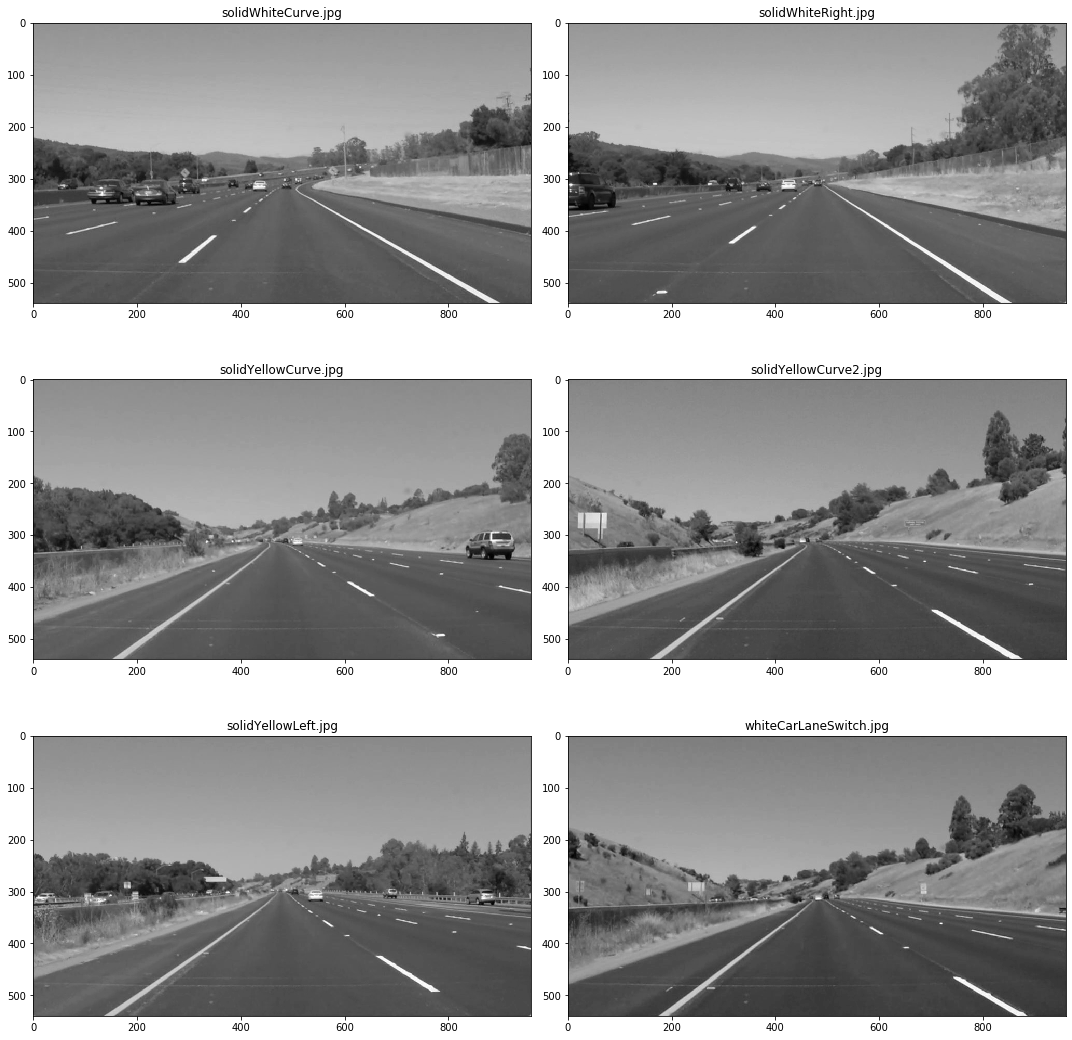

In [10]:
gray_imgs = [grayscale(img) for img in img_list]
display_imgs(gray_imgs, test_imgs)
save_imgs(gray_imgs, test_imgs, prefix="Gray")

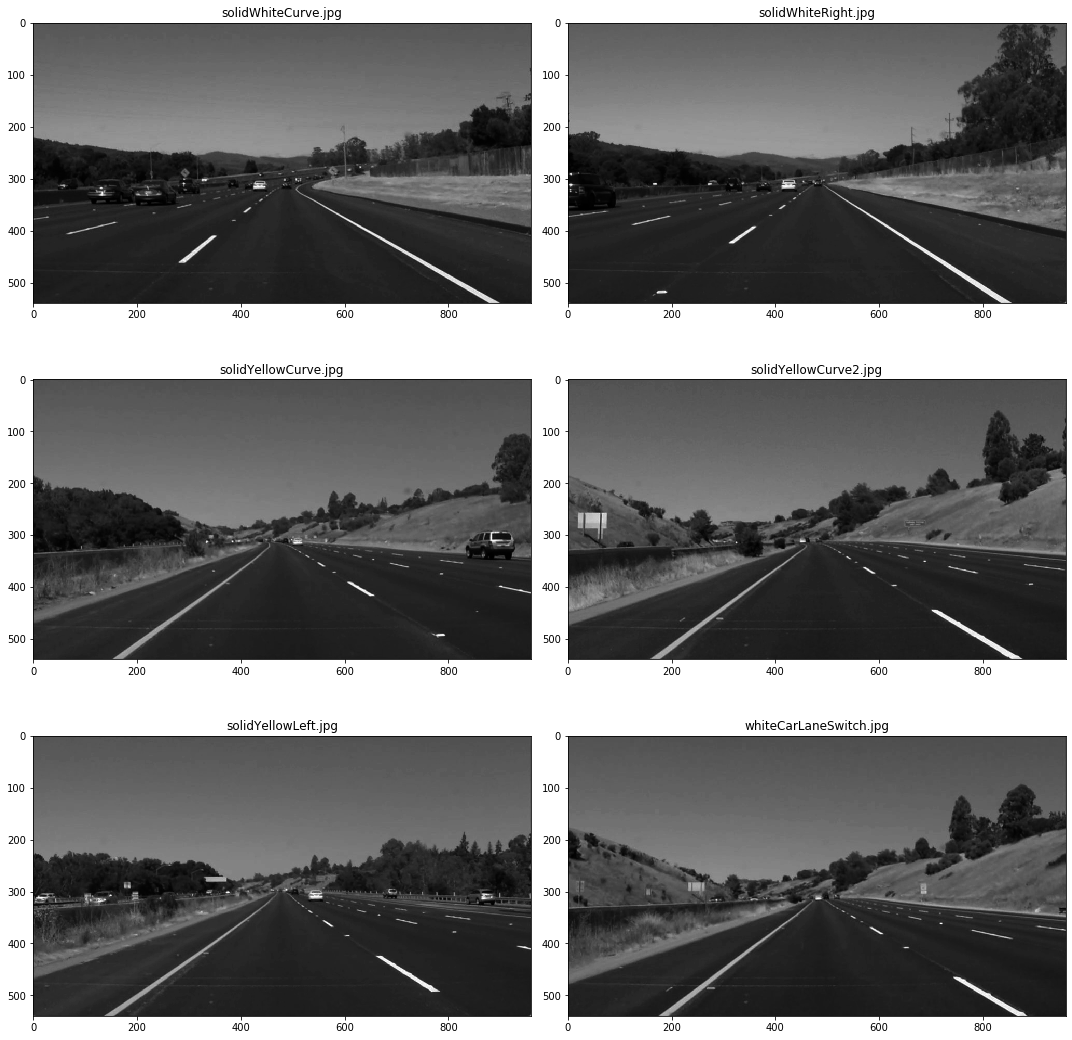

In [11]:
darkened_imgs = [adjust_gamma(img, 0.5) for img in gray_imgs]
display_imgs(darkened_imgs, test_imgs)
save_imgs(darkened_imgs, test_imgs, prefix="Darkened")

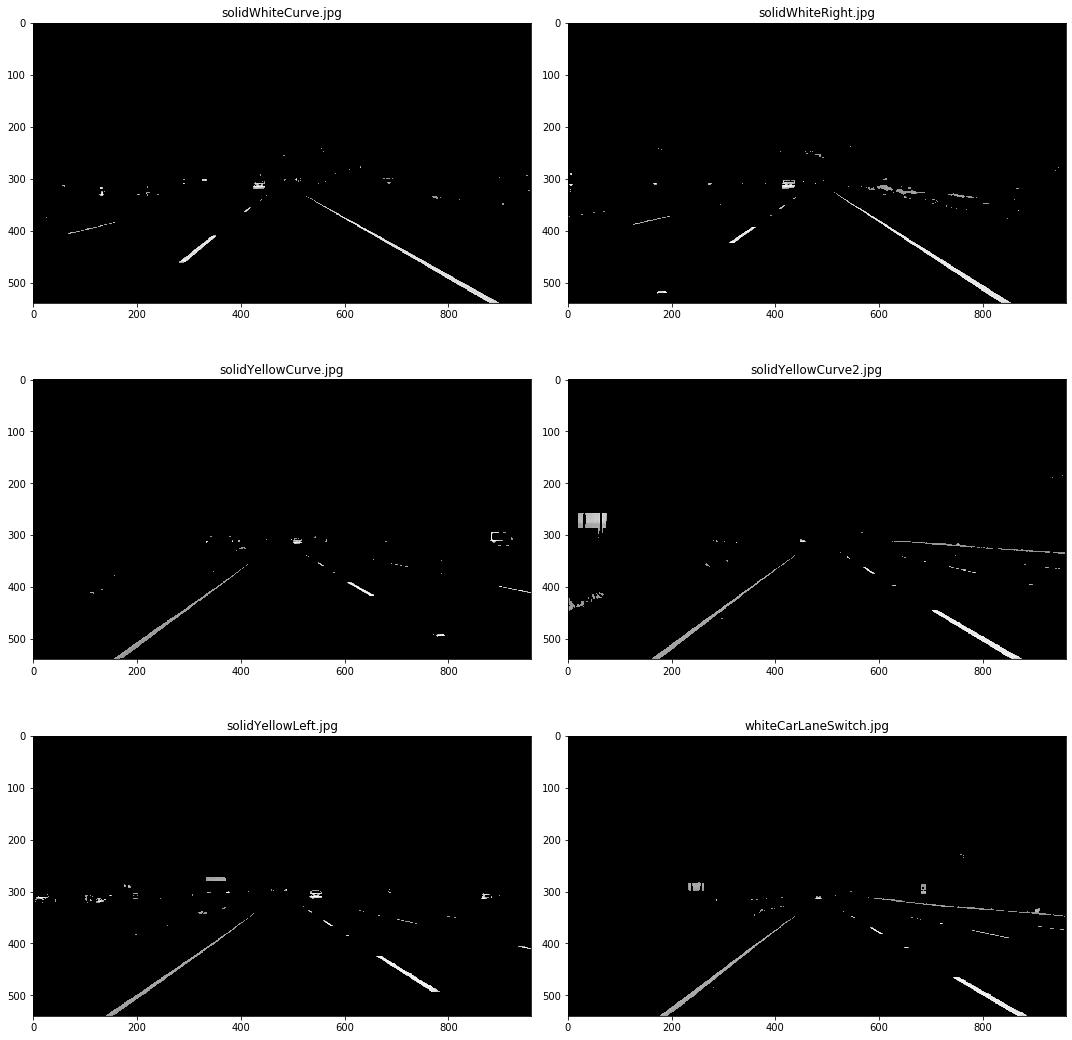

In [14]:
white_masks = [isolate_color_mask(img, np.array([210, 210, 210], dtype=np.uint8), np.array([255, 255, 255], dtype=np.uint8)) for img in img_list]
yellow_masks = [isolate_color_mask(img, np.array([190, 190, 0], dtype=np.uint8), np.array([255, 255, 255], dtype=np.uint8)) for img in img_list]
masked_imgs = []
for i in range(len(img_list)):
    mask = cv2.bitwise_or(white_masks[i], yellow_masks[i])
    masked_imgs.append(cv2.bitwise_and(darkened_imgs[i], darkened_imgs[i],mask=mask))
display_imgs(masked_imgs, test_imgs)

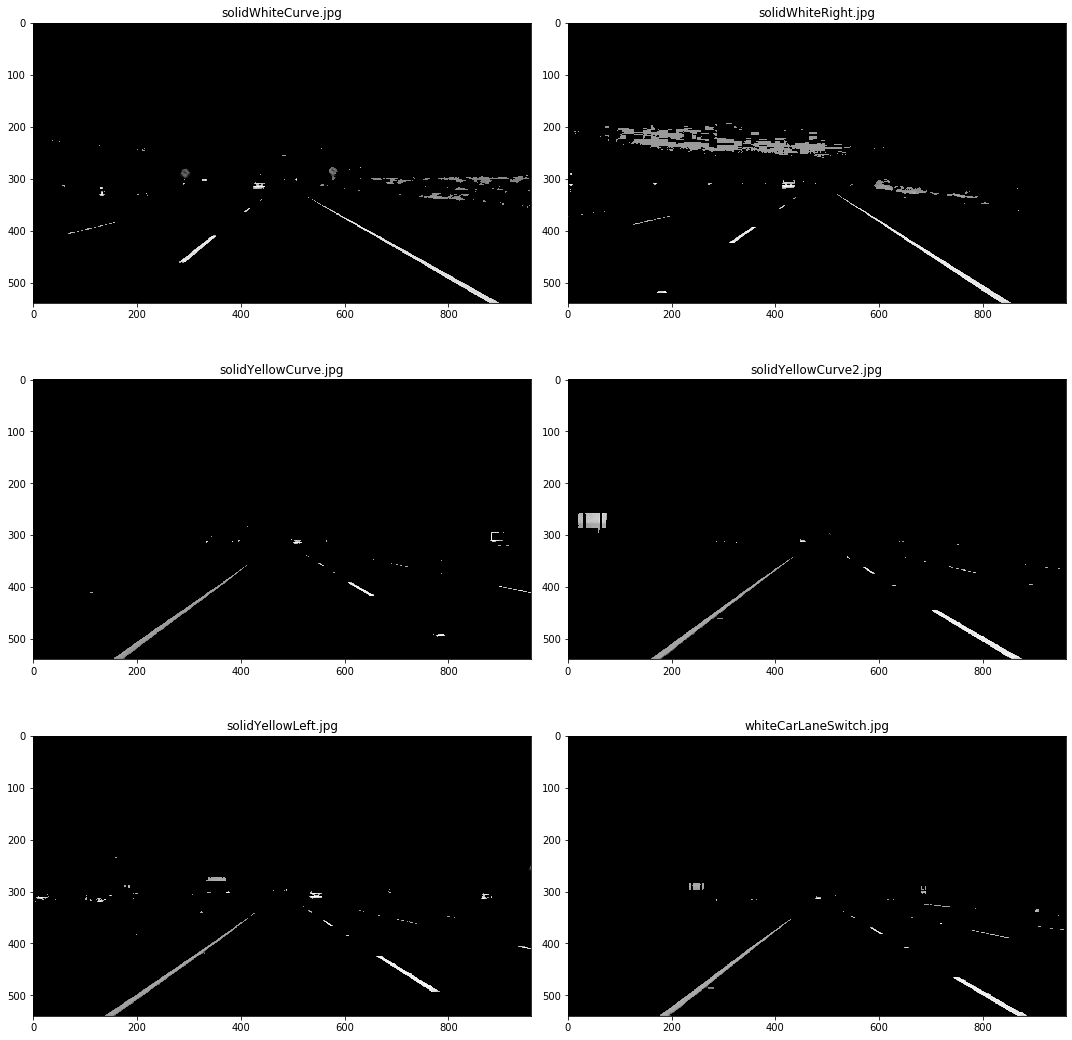

In [15]:
white_masks = []
yellow_masks = []
white_masks = [isolate_color_mask(to_hls(img), np.array([0, 200, 0], dtype=np.uint8), np.array([200, 255, 255], dtype=np.uint8)) for img in original_imgs]
yellow_masks = [isolate_color_mask(to_hls(img), np.array([10, 0, 100], dtype=np.uint8), np.array([40, 255, 255], dtype=np.uint8)) for img in original_imgs]
masked_imgs = []
for i in range(len(original_imgs)):
    mask = cv2.bitwise_or(white_masks[i], yellow_masks[i])
    masked_imgs.append(cv2.bitwise_and(darkened_imgs[i], darkened_imgs[i], mask=mask))

display_imgs(masked_imgs, test_imgs)
save_imgs(masked_imgs, test_imgs, prefix='Color_Mask')

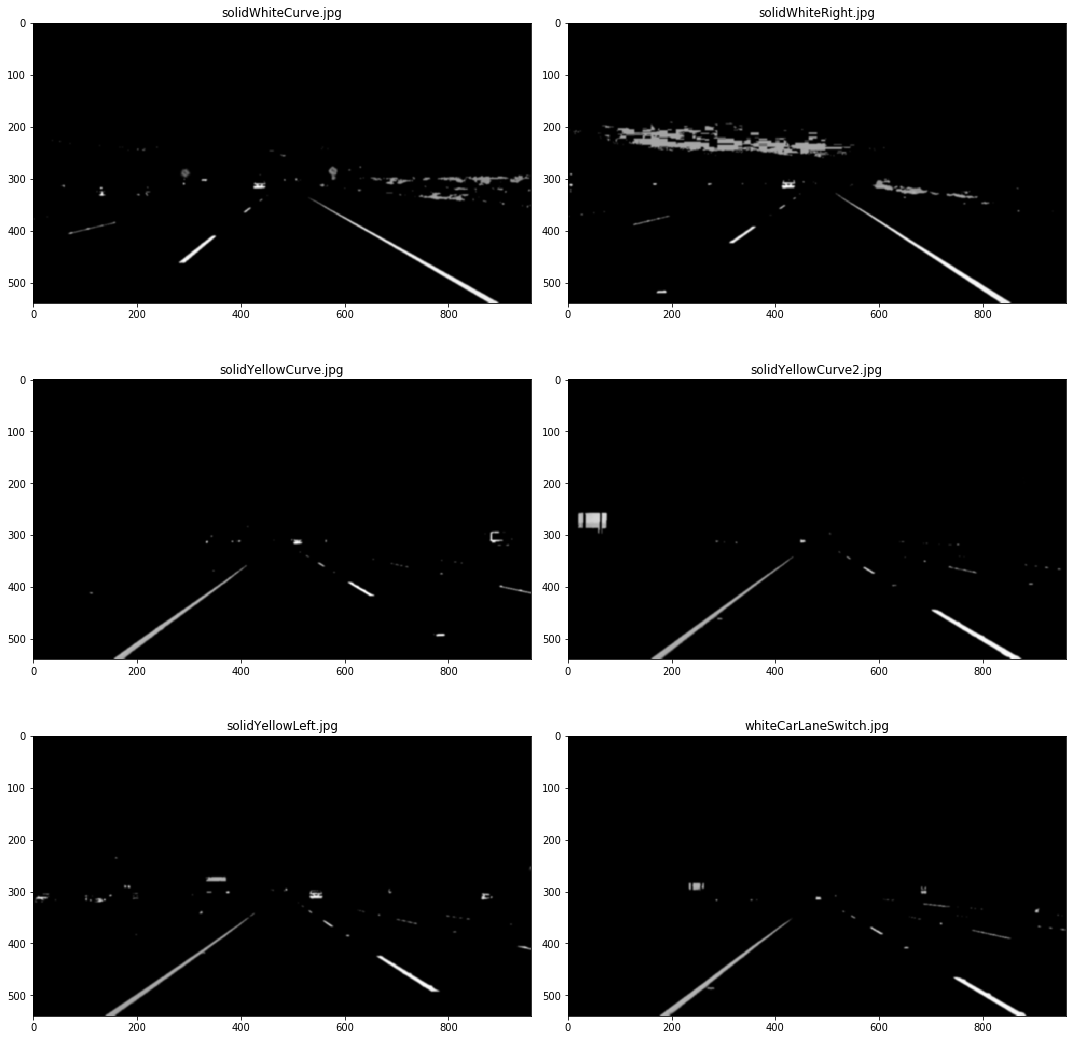

In [16]:
blurred_imgs = [gaussian_blur(img, kernel_size=7) for img in masked_imgs]
display_imgs(blurred_imgs, test_imgs)
save_imgs(blurred_imgs, test_imgs, prefix='Gaussian')

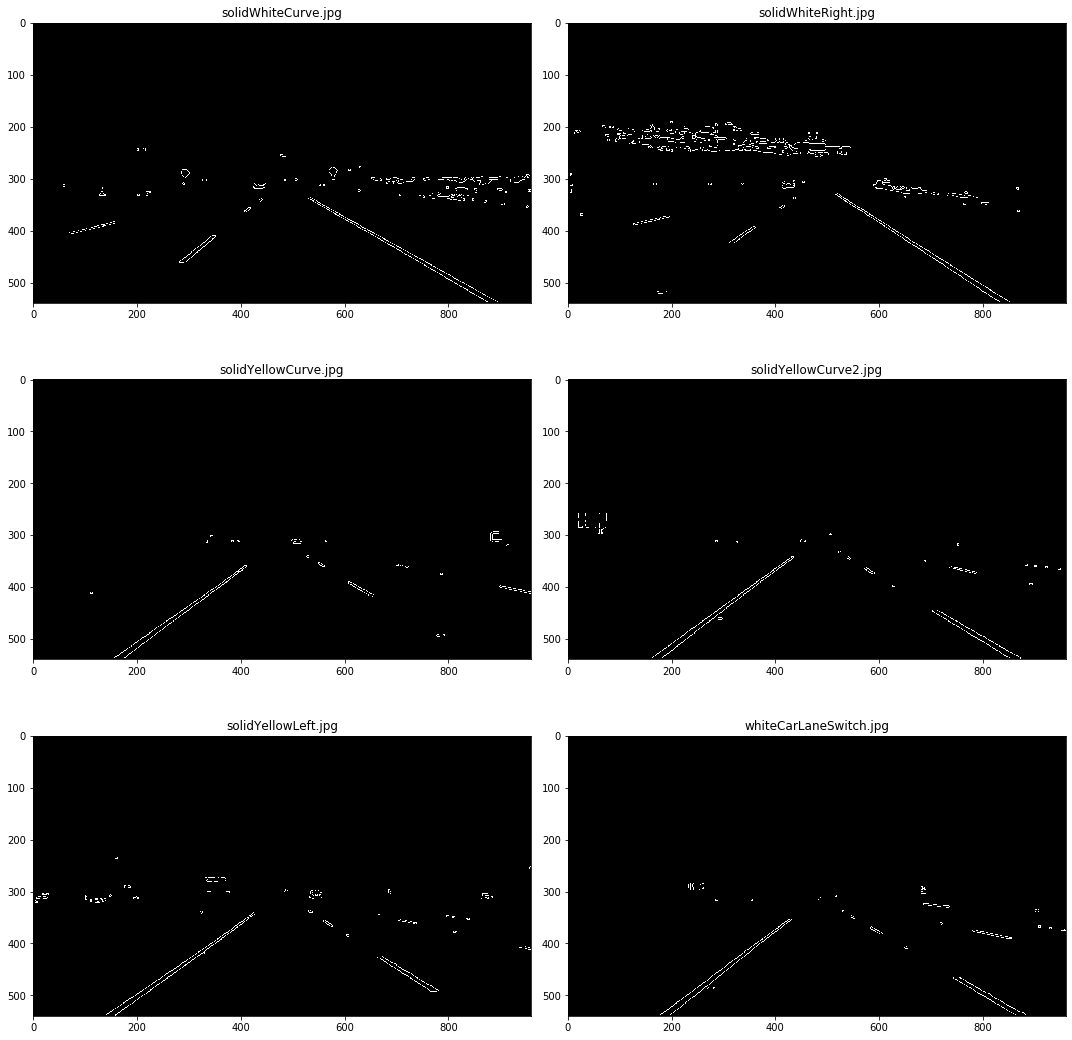

In [17]:
canny_imgs = [canny(img, low_threshold=70, high_threshold=140) for img in blurred_imgs]
display_imgs(canny_imgs, test_imgs)
save_imgs(canny_imgs, test_imgs, prefix='Canny')

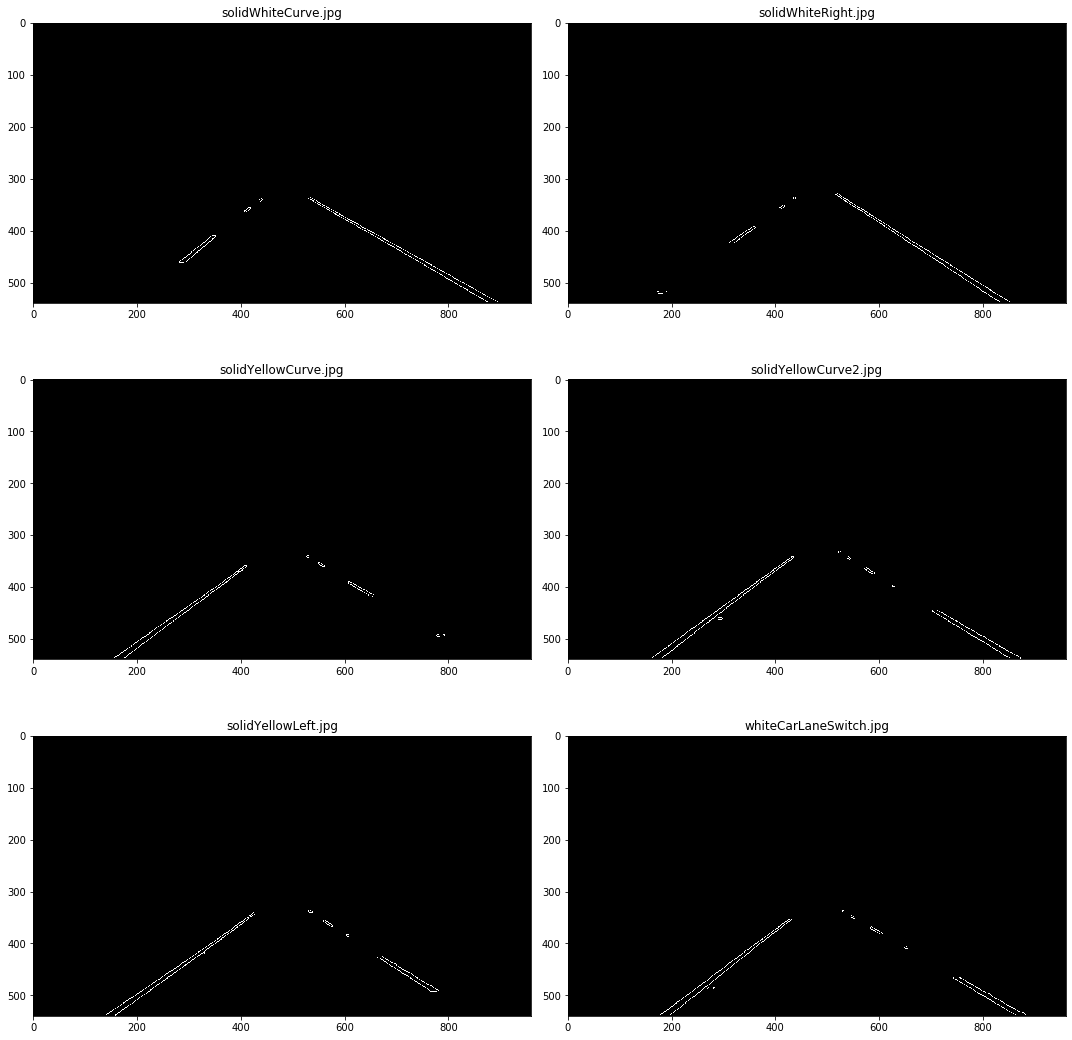

In [18]:
aoi_imgs = []

for img in canny_imgs:        
    aoi_imgs.append(get_aoi(img))
    
display_imgs(aoi_imgs, test_imgs)
save_imgs(aoi_imgs, test_imgs, prefix='AOI')

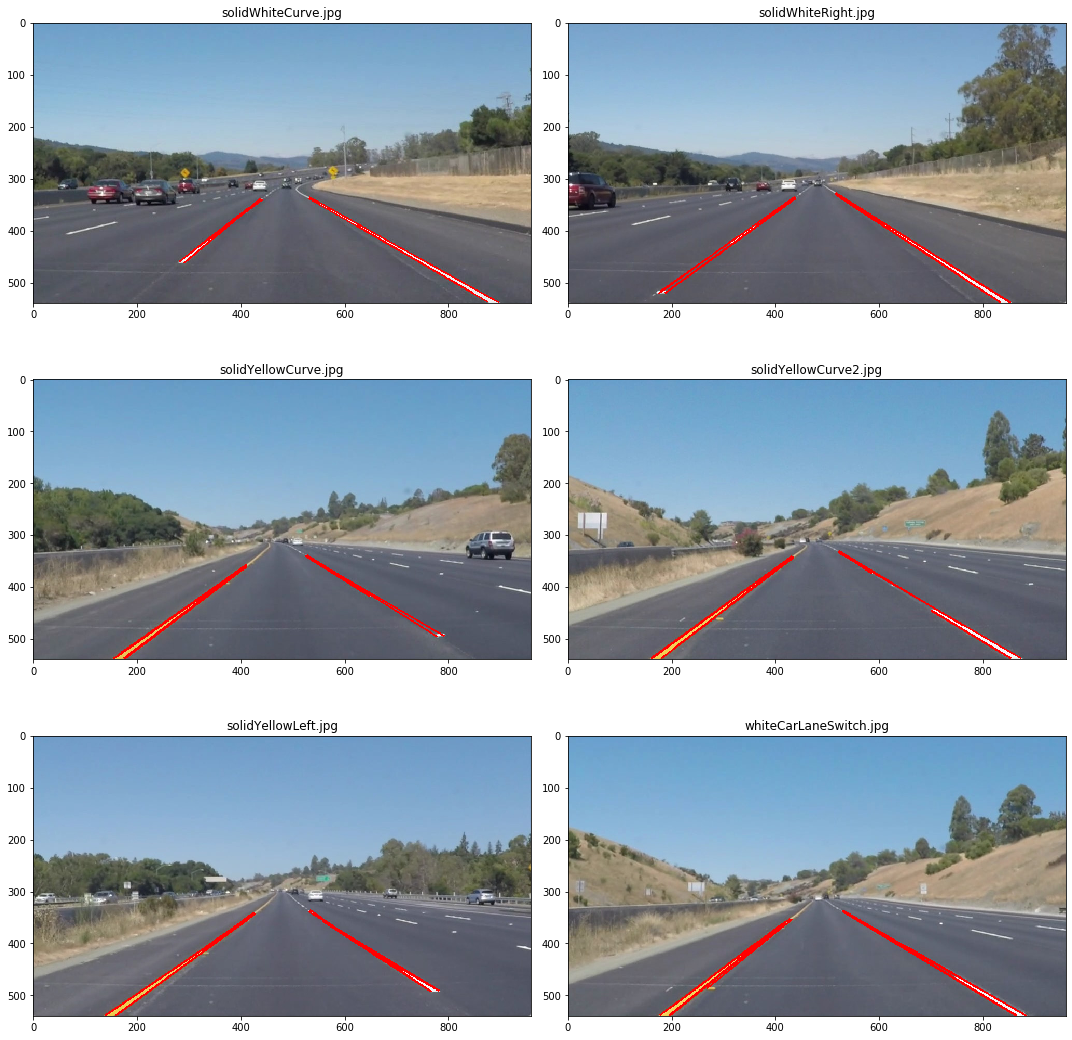

In [19]:

hough_lines_imgs = []
lines = []
for img in aoi_imgs:
    lines.append(get_hough_lines(img))
    
for img, line in zip(original_imgs, lines):
    hough_lines_imgs.append(draw_lines(img, line))
    
display_imgs(hough_lines_imgs, test_imgs)
save_imgs(hough_lines_imgs, test_imgs, prefix='Hough')

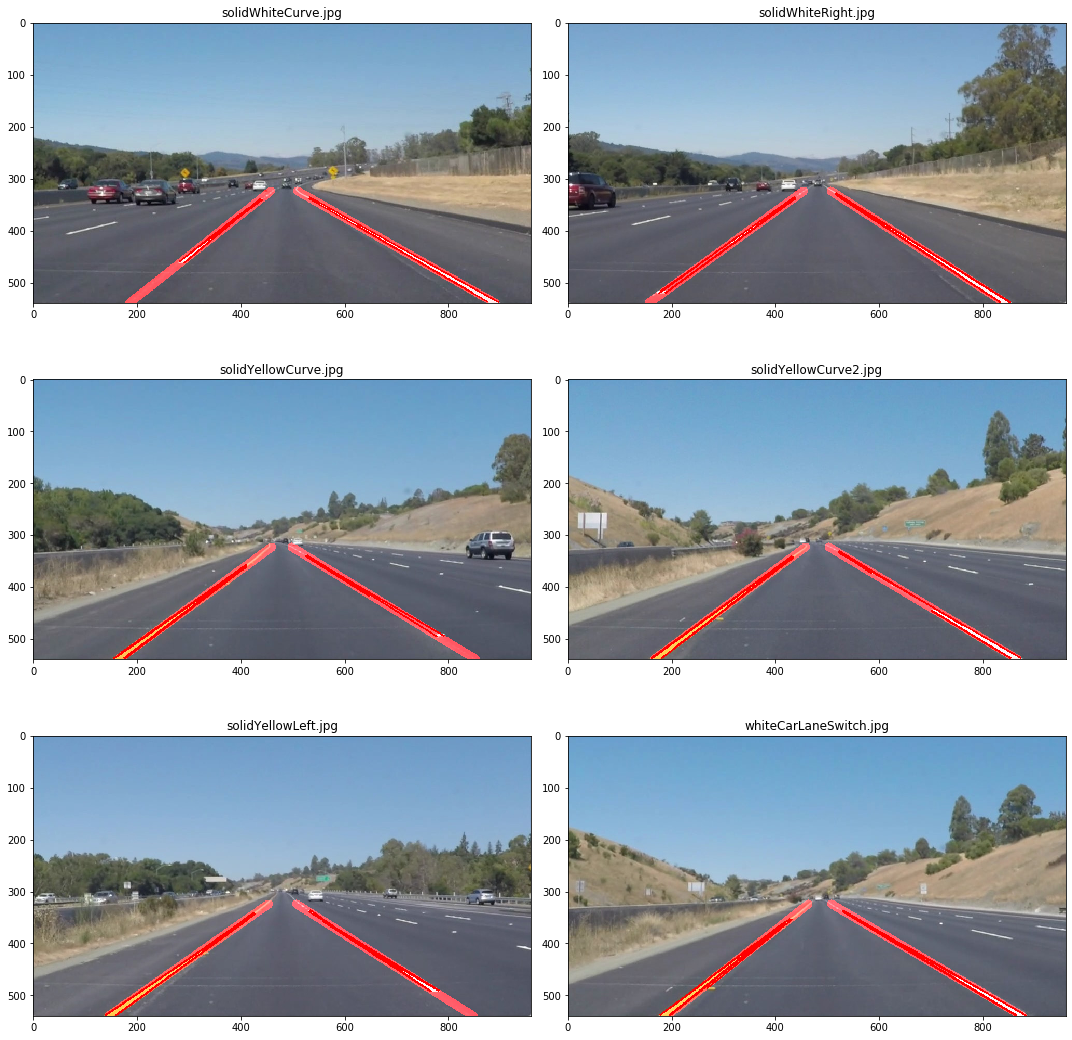

In [20]:
lane_lines_imgs =[]

for img, line in zip(original_imgs, lines):
    left_lane, right_lane = get_lane_lines(img, line)
    lane_lines_imgs.append(draw_weighted_lines(img, [left_lane, right_lane], thickness= 15))
    
display_imgs(lane_lines_imgs, test_imgs)
save_imgs(lane_lines_imgs, test_imgs, prefix='Extrapolation')